# Workshop 1. SOLUTIONS

#### Contact information of this notebook: Dr Rabia Aziza (rabia.aziza@warwick.ac.uk)

$\\ \ \\ \ \\ $



## 5. Other compartmental models 



#### SIS dynamics


<img src="img/SIS.png" style="width: 20%;"/>

### *$\rightarrow$Try it yourself*

- Copy the code from the SIR model above, and modify it to produce an implementation of the SIS model. Since there is no Recovered class in the SIS model, you should only have a two dimensional system of ODEs.
- Check the longterm dynamics of this model. How do they differ from an SIR?

### <font color='red'> $\rightarrow$ SOLUTION: </font>

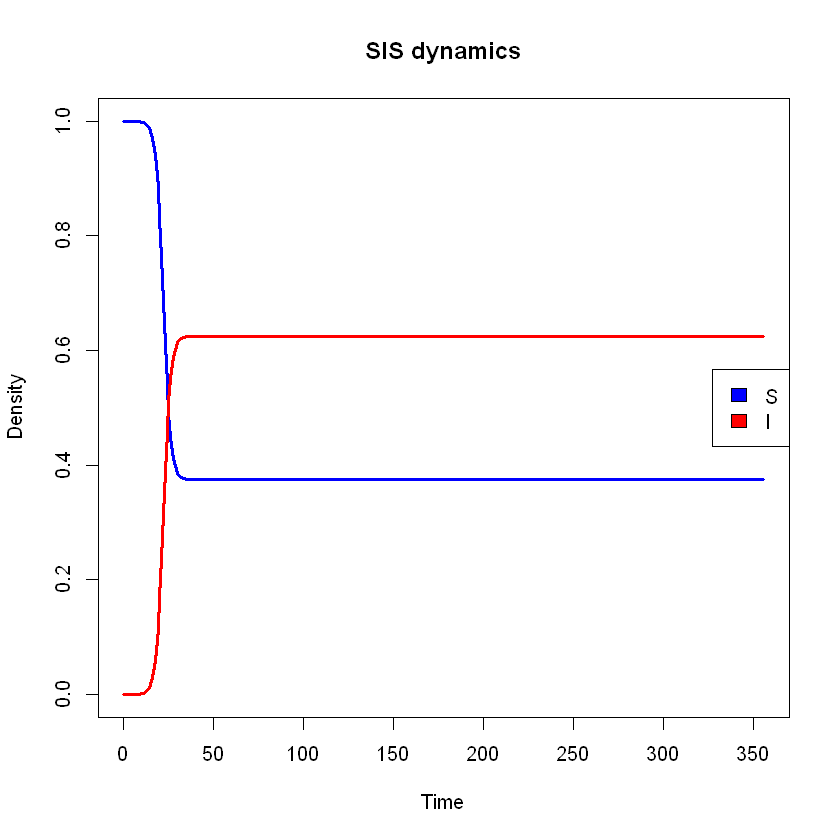

In [50]:
library(deSolve)
sis <- function(time, state, parameters) {
  with(as.list(c(state, parameters)), {
    dS <- gamma*I - beta*S*I
    dI <-  beta*S*I - gamma*I
    return(list(c(dS, dI)))
  })
}

parameters <- c(beta=.8,gamma=.3)
results <- ode(y=c(S=1-1e-5,I=1e-5), times=seq(0,356*1,by=1), func=sis, parms=parameters)

df<-as.data.frame(results)

plot(df[,1],df[,2],type="l",col="blue",lwd=3,xlab="Time",ylab="Density",main="SIS dynamics",ylim=c(0,1))
lines(df[,1],df[,3],col="red",lwd=3)
legend("right",c("S","I"),fill=c("blue","red","green")
)

#### SEIR dynamics

For many important infections there is a significant incubation period during which the individual is infected but not yet infectious. During this period the individual is in the Exposed compartment ($E$). Once the incubation period is over, the individual moves to the pool of infecteds $I$.
<img src="img/SEIR.png" style="width: 40%;"/>

### *$\rightarrow$Try it yourself*
- Copy the code from the SIR example above and modify it to obtain an implementation of the SEIR model. In this case we have four compartments and so your ODE model should have four equations.
- How does including the incubation period enfluence the disease dynamics? Compare to an SIR.

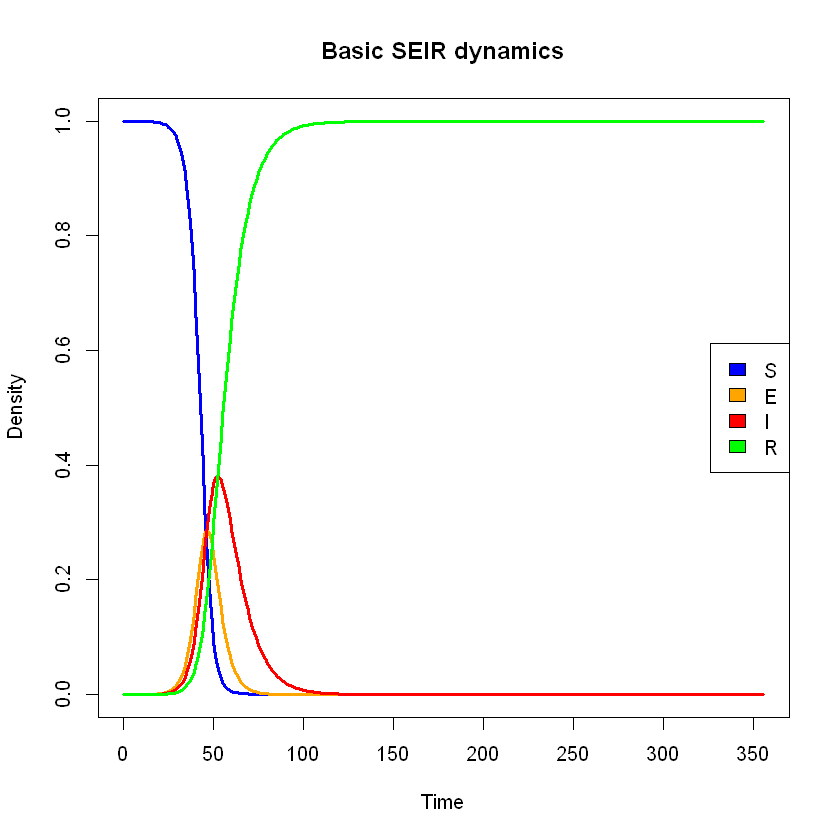

In [5]:
library(deSolve)
sir <- function(time, state, parameters) {
  with(as.list(c(state, parameters)), {
    dS <- -beta*S*I
    dE <- beta*S*I - sigma*E
    dI <- sigma*E - gamma*I
    dR <- gamma*I
    return(list(c(dS, dE, dI, dR)))
  })
}

parameters <- c(beta=.8,sigma=.2,gamma=.1)
results <- ode(y=c(S=1-1e-5,E=.0,I=1e-5,R=.0), times=seq(0,356*1,by=1), func=sir, parms=parameters)

df<-as.data.frame(results)
plot(df[,1],df[,2],type="l",col="blue",lwd=3,xlab="Time",ylab="Density",main="Basic SEIR dynamics",ylim=c(0,1))
lines(df[,1],df[,3],col="orange",lwd=3)
lines(df[,1],df[,4],col="red",lwd=3)
lines(df[,1],df[,5],col="green",lwd=3)
legend("right",c("S","E","I","R"),fill=c("blue","orange","red","green")
)

## 6. SIR with demography  



### *$\rightarrow$Try it yourself*
- In an SIR with demography, does the equation $\sum_{C_i\in Classes} \frac{dC_i}{dt} = 0$ (see *section 3.2*) hold? Explain.

- In the next cell, write an implementation of the SIR model with demography by adding birth and death events to the SIR model without demography. Solve the equations using `desolve` and plot your solution for a few values of $\mu$. In general sensible values of $\mu$ will be somewhere around $\frac{1}{70*365}$, depending on the population we are modelling. Why do you think this is?

### <font color='red'> $\rightarrow$ SOLUTION: </font>

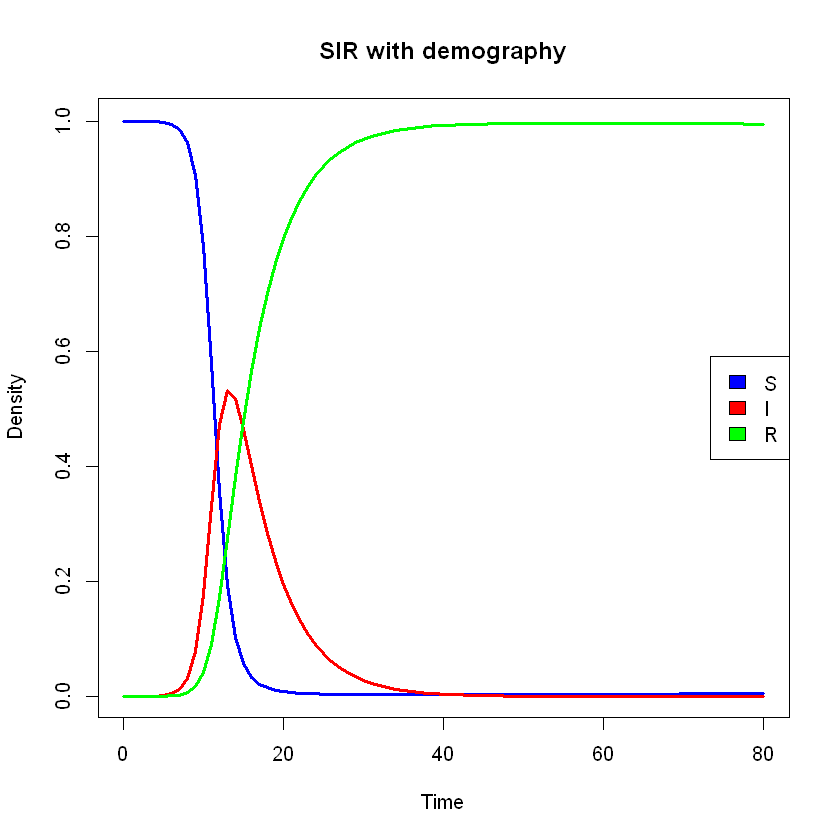

In [54]:
library(deSolve)
sir <- function(time, state, parameters) {
  with(as.list(c(state, parameters)), {
    dS <-  mu - beta*S*I - mu*S
    dI <-  beta*S*I - gamma*I - mu*I
    dR <-  gamma*I - mu*R
    return(list(c(dS, dI, dR)))
  })
}

results <- ode(y=c(S=1-1e-5, I=1e-5, R=.0), times=seq(0,80,by=1), func=sir, parms=c(beta=1.2,gamma=.2,mu=1/(70*356)))

df<-as.data.frame(results)
plot(df[,1],df[,2],type="l",col="blue",lwd=3,xlab="Time",ylab="Density",main="SIR with demography")
lines(df[,1],df[,3],col="red",lwd=3)
lines(df[,1],df[,4],col="green",lwd=3)
legend("right",c("S","I","R"),fill=c("blue","red","green")
)

## 7. Equilibrium and stability 


### *$\rightarrow$Try it yourself*
Using the code you wrote to implement the SIR model with demography, find parameter choices $(\beta , \gamma, \mu)$ so that the system tends towards:

- A disease-free equilibrium    
 
  SOLUTION: $\beta=.8,\gamma=.9,\mu=1/(70*365)$    So $\beta <\gamma$
 
- An endemic equilibrium

SOLUTION: $\beta =2,\gamma =.2, \mu=10/(70*356)$


## 8. Going further

- We suppose we have two outbreks with the same $\beta$ 
    - What could be said about them if we also have $\beta > \gamma$?
 
 SOLUTION: In this case, $R_0$ is greater than 1, so the infection will invade the population
    
    - Try plotting outbreaks with $\gamma=\frac{1}{5}$ and $\gamma=\frac{1}{300}$ and compare their behavior. Think about the qualitative difference between these infections and how it impacts their longterm dynamics. You should try this out for a few values of $\beta$


- What could be said about the infectious process modelled by the following schematic? Write the corresponding equations and implement the model.

<img src="img/SI_withdemography2.png" style="width: 20%;"/>

SOLUTION: 
$\left\{\begin{array}{ll}
          \frac{dS}{dt}= - \beta SI - \mu S\\
          \frac{dI}{dt}= \beta SI - \mu I
        \end{array}
      \right.$

- Consider the following  set of equations:

<center>$\left\{\begin{array}{ll}
          \frac{dS}{dt}= - \beta SI + \gamma_1 I - vR \\
          \frac{dI}{dt}= \beta SI - (\gamma_1+\gamma_2) I \\
          \frac{dR}{dt}= vR + \gamma_2 I 
        \end{array}
      \right.$</center>
      
   - What processes are happening in this model? Try drawing a diagram of the compartments.
   
 SOLUTION: 

<img src="img/SIR_withGamma1Gamma2.png" style="width: 30%;"/>

   - What could $v$ represent?  <font color='red'>The rate of vaccination</font>
   - We would like to add demography to this model. Suppose that the overall birth rate is $b$ and that out of each cohort of $b$ births, a total of $m$ newborns are born with a lifelong innate immunity to the infection. As usual, use $\mu$ to denote the natural death rate. Draw the model, update the corresponding equations, and implement the model in code.
   
   
   
SOLUTION: 

<img src="img/SIR_withGamma1Gamma2.png" style="width: 30%;"/>
<img src="img/SIR_withGamma1Gamma2B.png" style="width:35%;"/>

<center>$\left\{\begin{array}{ll}
          \frac{dS}{dt}= (b-m) - \beta SI + \gamma_1 I - vR - \mu S\\
          \frac{dI}{dt}= \beta SI - (\gamma_1+\gamma_2) I - \mu I\\
          \frac{dR}{dt}= m + vR + \gamma_2 I - \mu R
        \end{array}
      \right.$</center>


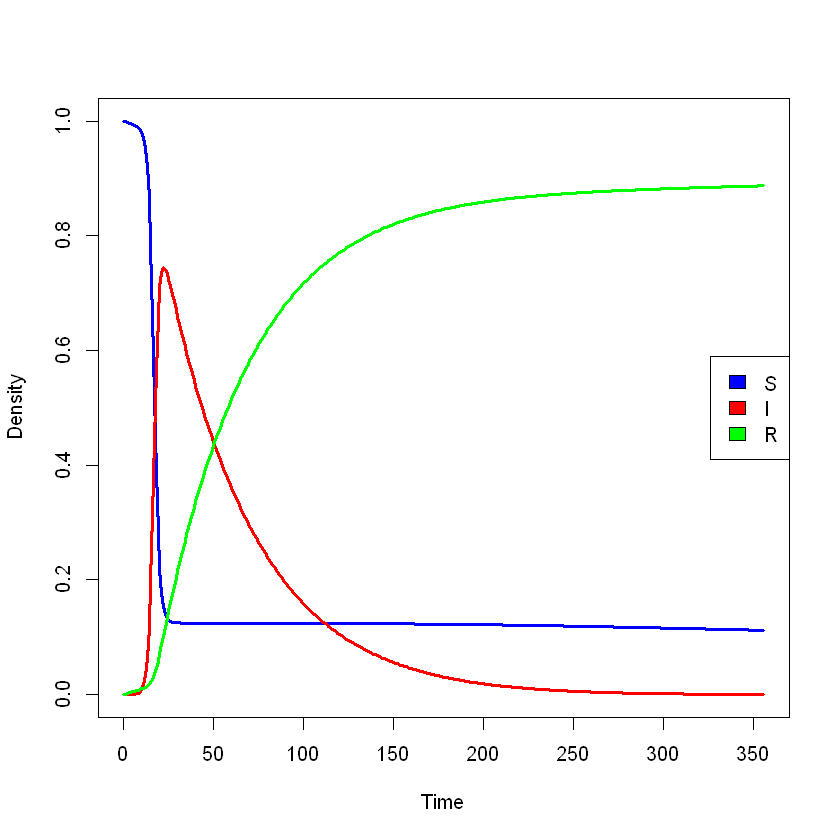

In [48]:
library(deSolve)
sir <- function(time, state, parameters) {
  with(as.list(c(state, parameters)), {
    dS <-  (b-m) - beta*S*I +gamma1*I -v*S - mu*S
    dI <-  beta*S*I - (gamma1+gamma2)*I - mu*I
    dR <-  m + v*S + gamma2*I - mu*R
    return(list(c(dS, dI, dR)))
  })
}

results <- ode(y=c(S=1-1e-5, I=1e-5, R=0), times=seq(0,356*1,by=1), func=sir, 
               parms=c(beta=.8,gamma1=.1,gamma2=.02,mu=1/(70*356),b=1/(70*356),m=.01/(70*356),v=1e-3))

df<-as.data.frame(results)
plot(df[,1],df[,2],type="l",col="blue",lwd=3,xlab="Time",ylab="Density",ylim=c(0,1))
lines(df[,1],df[,3],col="red",lwd=3)
lines(df[,1],df[,4],col="green",lwd=3)
legend("right",c("S","I","R"),fill=c("blue","red","green")
)

      
   - What parameter choices will keep the population size fixed with time?  
   
   SOLUTION: Any parameter choice with $b=\mu$ </font>

- Model and plot the dynamics of an SIRS with demography

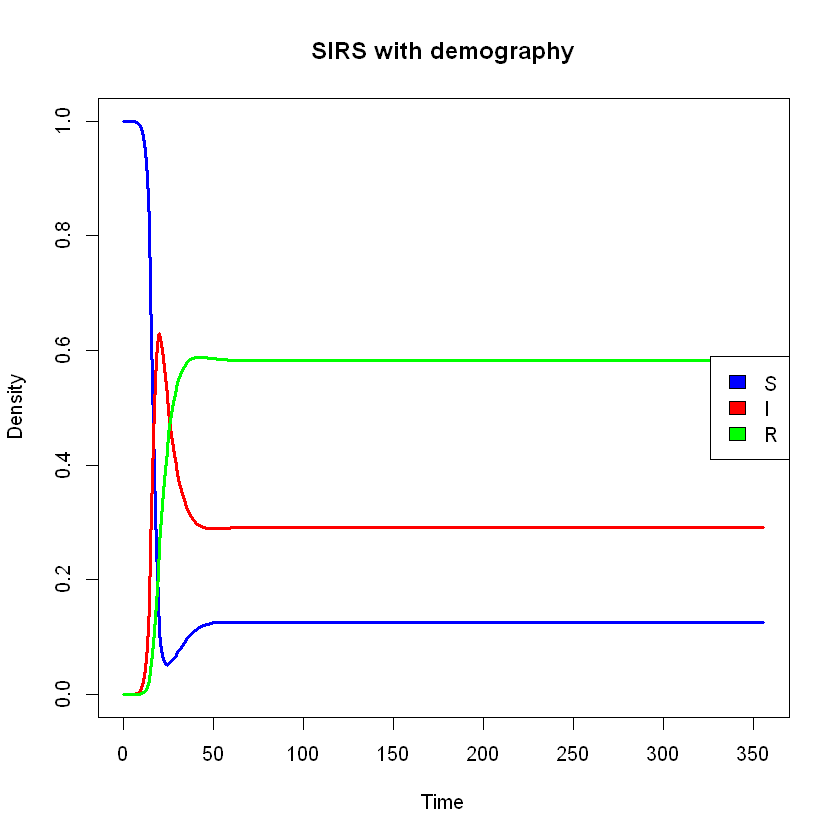

In [60]:
## SIRS dynamics
library(deSolve)
sir <- function(time, state, parameters) {
  with(as.list(c(state, parameters)), {
    dS <- mu -beta*S*I -mu*S + omega*R
    dI <- beta*S*I - gamma*I -nu*I
    dR <- gamma*I - omega*R - mu*R
    return(list(c(dS, dI, dR)))
  })
}

parameters <- c(beta=.8,gamma=.1,omega=.05,mu=1/(70*356),nu=1/(70*356))
results <- ode(y=c(S=1-1e-5,I=1e-5,R=.0), times=seq(0,356*1,by=1), func=sir, parms=parameters)

df<-as.data.frame(results)
plot(df[,1],df[,2],type="l",col="blue",lwd=3,xlab="Time",ylab="Density",main="SIRS with demography",ylim=c(0,1))
lines(df[,1],df[,3],col="red",lwd=3)
lines(df[,1],df[,4],col="green",lwd=3)
legend("right",c("S","I","R"),fill=c("blue","red","green")
)


- Model the dynamics of an SEIR with demography and disease induced mortality

### <font color='red'> $\rightarrow$ SOLUTION: </font>

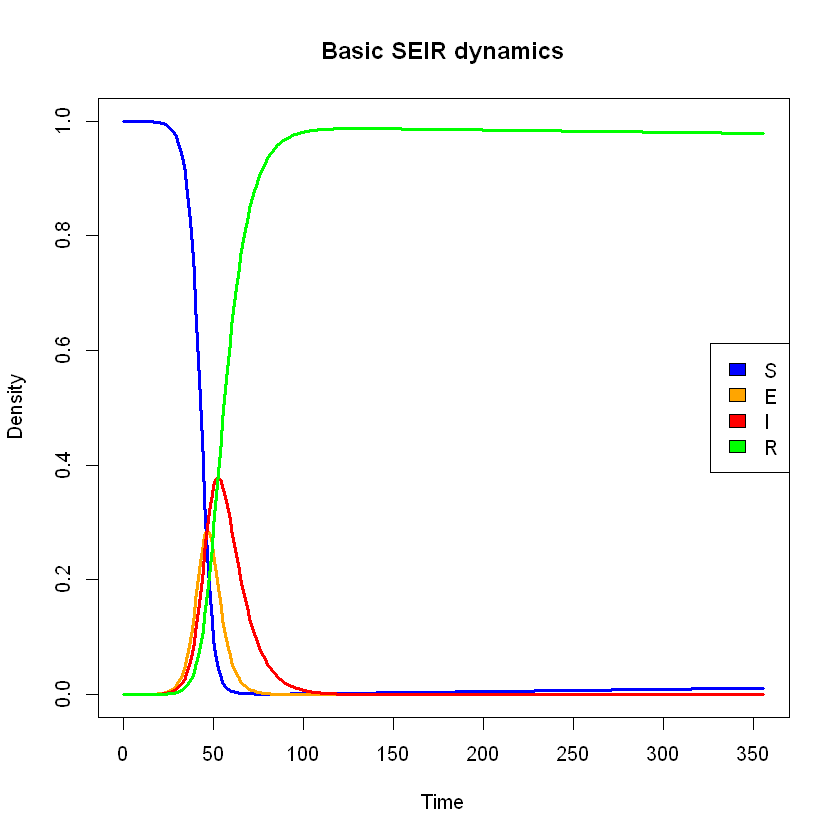

In [6]:
## SEIR dynamics

library(deSolve)
sir <- function(time, state, parameters) {
  with(as.list(c(state, parameters)), {
    dS <- mu -beta*S*I -mu*S
    dE <- beta*S*I - sigma*E - mu*E
    dI <- sigma*E - gamma*I - mu*I -nu*I
    dR <- gamma*I - mu*R
    return(list(c(dS, dE, dI, dR)))
  })
}

parameters <- c(beta=.8,sigma=.2,gamma=.1,mu=1/(70*356),nu=1e-3)
results <- ode(y=c(S=1-1e-5,E=.0,I=1e-5,R=.0), times=seq(0,356*1,by=1), func=sir, parms=parameters)

df<-as.data.frame(results)
plot(df[,1],df[,2],type="l",col="blue",lwd=3,xlab="Time",ylab="Density",main="Basic SEIR dynamics",ylim=c(0,1))
lines(df[,1],df[,3],col="orange",lwd=3)
lines(df[,1],df[,4],col="red",lwd=3)
lines(df[,1],df[,5],col="green",lwd=3)
legend("right",c("S","E","I","R"),fill=c("blue","orange","red","green")
)